In [1]:
import pymysql

connector = pymysql.connect(user='dev', password='ax2',host='127.0.0.1',port=3307,db='pythonexam')
cursor = connector.cursor()

query = ('SELECT country,deaths_1miopop from corona20200515 WHERE LENGTH(total_cases) > 6 and not country = %s and not country = %s and not country = %s and not country = %s and not country = %s and not country = %s and not country = %s and not country = %s and not country = %s')
where_not = "North America", "Asia", "South America", "Europe", "World", "Total:", "Africa", "Oceania", "South Africa"
cursor.execute(query, where_not)

countries = []
total_deaths =[]
total = []
for country, totaldeaths in cursor:
    countries.append(country)
    deaths = totaldeaths.replace(',','')
    deaths_int = int(deaths)
    total_deaths.append(deaths_int)
    
cursor.close()
connector.close()

In [3]:
import pandas as pd

df = pd.DataFrame({'Deaths pr. 1mio': total_deaths},countries)
df

,Deaths pr. 1mio
USA,263
Spain,587
Russia,17
UK,495
Italy,519
Brazil,66
France,420
Germany,95
Turkey,48
Iran,82


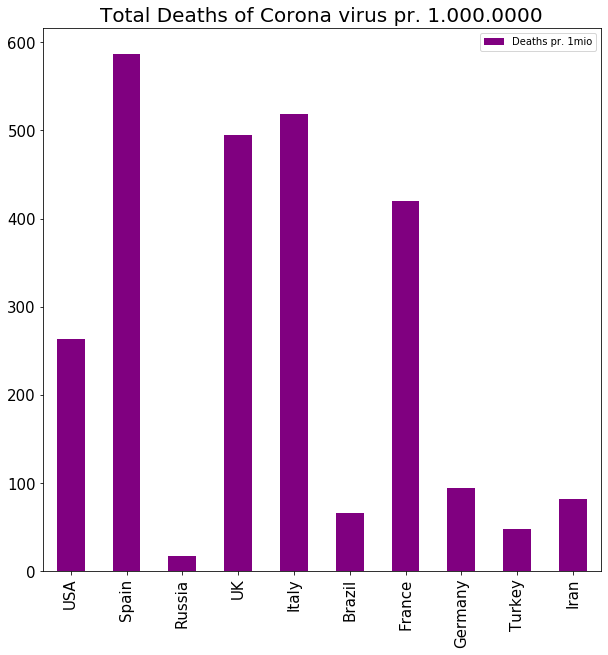

In [9]:
import matplotlib.pyplot as plt

df.plot.bar(figsize=(10,10), color='purple')

plt.title('Total Deaths of Corona virus pr. 1.000.0000', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plt.show()
#plt.savefig('1mio_deaths_2020-05-15.jpg')